In [77]:
# imports
import math
import numpy as np
import pandas as pd
from pandas import Series
pd.set_option('max_columns', None)
pd.set_option('display.max_colwidth', None)

from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

In [2]:
# loading in data
weeks = []
for i in range(8):
    weeks.append(pd.read_csv('../nfl-big-data-bowl-2023/week' + str(i + 1) + '.csv'))
tracking = pd.concat(weeks)

players = pd.read_csv('../nfl-big-data-bowl-2023/players.csv')
scouting = pd.read_csv('../nfl-big-data-bowl-2023/pffScoutingData.csv')
plays = pd.read_csv('../nfl-big-data-bowl-2023/plays.csv')
games = pd.read_csv('../nfl-big-data-bowl-2023/games.csv')

In [4]:
def label_outcome(row):
    if row['pff_hitAllowed'] == 1.0:
        return 1
    elif row['pff_hurryAllowed'] == 1.0:
        return 1
    elif row['pff_sackAllowed'] == 1.0:
        return 1
    else:
        return 0
    
def label_play_val(row, column):
    play = plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId'])].iloc[0]
    return play[column]

def get_qb_coords(row, xy):
    qb_scouting = scouting.loc[(scouting['gameId'] == row['gameId']) & (scouting['playId'] == row['playId']) & (scouting['pff_role'] == 'Pass')].iloc[0]
    qb_id = qb_scouting['nflId']
    try:
        qb_tracking = at_snap.loc[(at_snap['gameId'] == row['gameId']) & (at_snap['playId'] == row['playId']) & (at_snap['nflId'] == qb_id)].iloc[0]
        return qb_tracking[xy] 
    except:
        return 1000000

def get_player_coords(row, player_id, xy):
    try:
        player_tracking = at_snap.loc[(at_snap['gameId'] == row['gameId']) & (at_snap['playId'] == row['playId']) & (at_snap['nflId'] == row[player_id])].iloc[0]
        return player_tracking[xy]
    except:
        return 1000000


In [166]:
model_data = scouting.loc[scouting['pff_role'] == 'Pass Block']

at_snap = tracking.loc[tracking['event'] == 'ball_snap']

model_data['outcome'] = model_data.apply (lambda row: label_outcome(row), axis=1)

model_data['down'] = model_data.apply (lambda row: label_play_val(row, 'down'), axis=1)
model_data['yardsToGo'] = model_data.apply (lambda row: label_play_val(row, 'yardsToGo'), axis=1)
model_data['offenseFormation'] = model_data.apply (lambda row: label_play_val(row, 'offenseFormation'), axis=1)
model_data['defendersInBox'] = model_data.apply (lambda row: label_play_val(row, 'defendersInBox'), axis=1)
model_data['personnelO'] = model_data.apply (lambda row: label_play_val(row, 'personnelO'), axis=1)
model_data['personnelD'] = model_data.apply (lambda row: label_play_val(row, 'personnelD'), axis=1)

model_data['qbX'] = model_data.apply (lambda row: get_qb_coords(row, 'x'), axis=1)
model_data['qbY'] = model_data.apply (lambda row: get_qb_coords(row, 'y'), axis=1)

model_data['offenseX'] = model_data.apply (lambda row: get_player_coords(row, 'nflId', 'x'), axis=1)
model_data['offenseY'] = model_data.apply (lambda row: get_player_coords(row, 'nflId', 'y'), axis=1)

model_data['defenseX'] = model_data.apply (lambda row: get_player_coords(row, 'pff_nflIdBlockedPlayer', 'x'), axis=1)
model_data['defenseY'] = model_data.apply (lambda row: get_player_coords(row, 'pff_nflIdBlockedPlayer', 'y'), axis=1)

model_data.head()


DONE1
DONE2
DONE3
DONE4


<ipython-input-166-a3877f864a5d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-a3877f864a5d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-a3877f864a5d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-166-a38

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,outcome,down,yardsToGo,offenseFormation,defendersInBox,personnelO,personnelD,qbX,qbY,offenseX,offenseY,defenseX,defenseY
23745,2021091213,3494,43345,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,41239.0,PP,0.0,1,4,10,SHOTGUN,6.0,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",78.84,29.47,75.31,28.20,73.41,25.28
69081,2021092611,2057,35481,Pass Block,TE-L,NaN,NaN,NaN,0.0,0.0,0.0,1.0,41239.0,PP,0.0,1,1,10,SHOTGUN,3.0,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",65.52,23.95,68.97,28.90,71.40,31.12
70050,2021092611,4165,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,1.0,41239.0,CL,0.0,1,1,10,SHOTGUN,6.0,"1 RB, 1 TE, 3 WR","2 DL, 3 LB, 6 DB",86.13,29.99,90.31,29.74,91.81,26.67
135315,2021101706,3393,47914,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,41239.0,PP,0.0,1,2,10,SHOTGUN,6.0,"1 RB, 2 TE, 2 WR","2 DL, 3 LB, 6 DB",26.79,29.36,30.58,31.19,32.29,32.27
174295,2021103105,2539,47838,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,41239.0,PP,0.0,1,1,10,SHOTGUN,6.0,"1 RB, 1 TE, 3 WR","2 DL, 4 LB, 5 DB",30.01,23.56,33.47,22.03,35.15,20.84


In [145]:
def getDistances(p1X, p1Y, p2X, p2Y):
    return math.sqrt((p1X - p2X)**2 + (p1Y - p2Y)**2)

model_data['qbDefenseDist'] = model_data.apply(lambda row: getDistances(row.qbX, row.qbY, row.defenseX, row.defenseY), axis=1)
model_data['qbOffenseDist'] = model_data.apply(lambda row: getDistances(row.qbX, row.qbY, row.offenseX, row.offenseY), axis=1)
model_data['offenseDefenseDist'] = model_data.apply(lambda row: getDistances(row.offenseX, row.offenseY, row.defenseX, row.defenseY), axis=1)


In [168]:
cleaned_model_data = model_data.loc[
    (model_data['qbX'] != 1000000) | 
    (model_data['qbY'] != 1000000) |
    (model_data['offenseX'] != 1000000) |
    (model_data['offenseY'] != 1000000) |
    (model_data['defenseX'] != 1000000) |
    (model_data['defenseY'] != 1000000)]
cleaned_model_data.head()

cleaned_model_data['numRBs'] = cleaned_model_data['personnelO'].str[0]
cleaned_model_data['numTEs'] = cleaned_model_data['personnelO'].str[6]
cleaned_model_data['numWRs'] = cleaned_model_data['personnelO'].str[12]

cleaned_model_data['numDLs'] = cleaned_model_data['personnelD'].str[0]
cleaned_model_data['numLBs'] = cleaned_model_data['personnelD'].str[6]
cleaned_model_data['numDBs'] = cleaned_model_data['personnelD'].str[12]


X = cleaned_model_data[['pff_positionLinedUp', 'down', 'yardsToGo', 'offenseFormation', 'defendersInBox', 'numRBs', 'numTEs', 'numWRs', 'numDLs', 'numLBs', 'numDBs', 'qbDefenseDist', 'qbOffenseDist', 'offenseDefenseDist']]

X.pff_positionLinedUp = X.pff_positionLinedUp.astype('category').cat.codes
X.offenseFormation = X.offenseFormation.astype('category').cat.codes

column_names = list(X.columns.values)
print(X.head())
X = X.to_numpy()
Y = cleaned_model_data[['outcome']].to_numpy()


        pff_positionLinedUp  down  yardsToGo  offenseFormation  \
23745                     1     4         10                 0   
69081                     3     1         10                 0   
70050                     0     1         10                 0   
135315                    1     2         10                 0   
174295                    2     1         10                 0   

        defendersInBox numRBs numTEs numWRs numDLs numLBs numDBs  \
23745              6.0      1      1      3      2      3      6   
69081              3.0      1      1      3      2      3      6   
70050              6.0      1      1      3      2      3      6   
135315             6.0      1      2      2      2      3      6   
174295             6.0      1      1      3      2      4      5   

        qbDefenseDist  qbOffenseDist  offenseDefenseDist  
23745        6.858644       3.751506            3.483734  
69081        9.272718       6.033656            3.291398  
70050        6.57

/Users/siddharthboppana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)

model = XGBClassifier()
model.fit(X_train, Y_train)

P = model.predict_proba(X_test)
print(P)

/Users/siddharthboppana/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/siddharthboppana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 0, 'Importance')

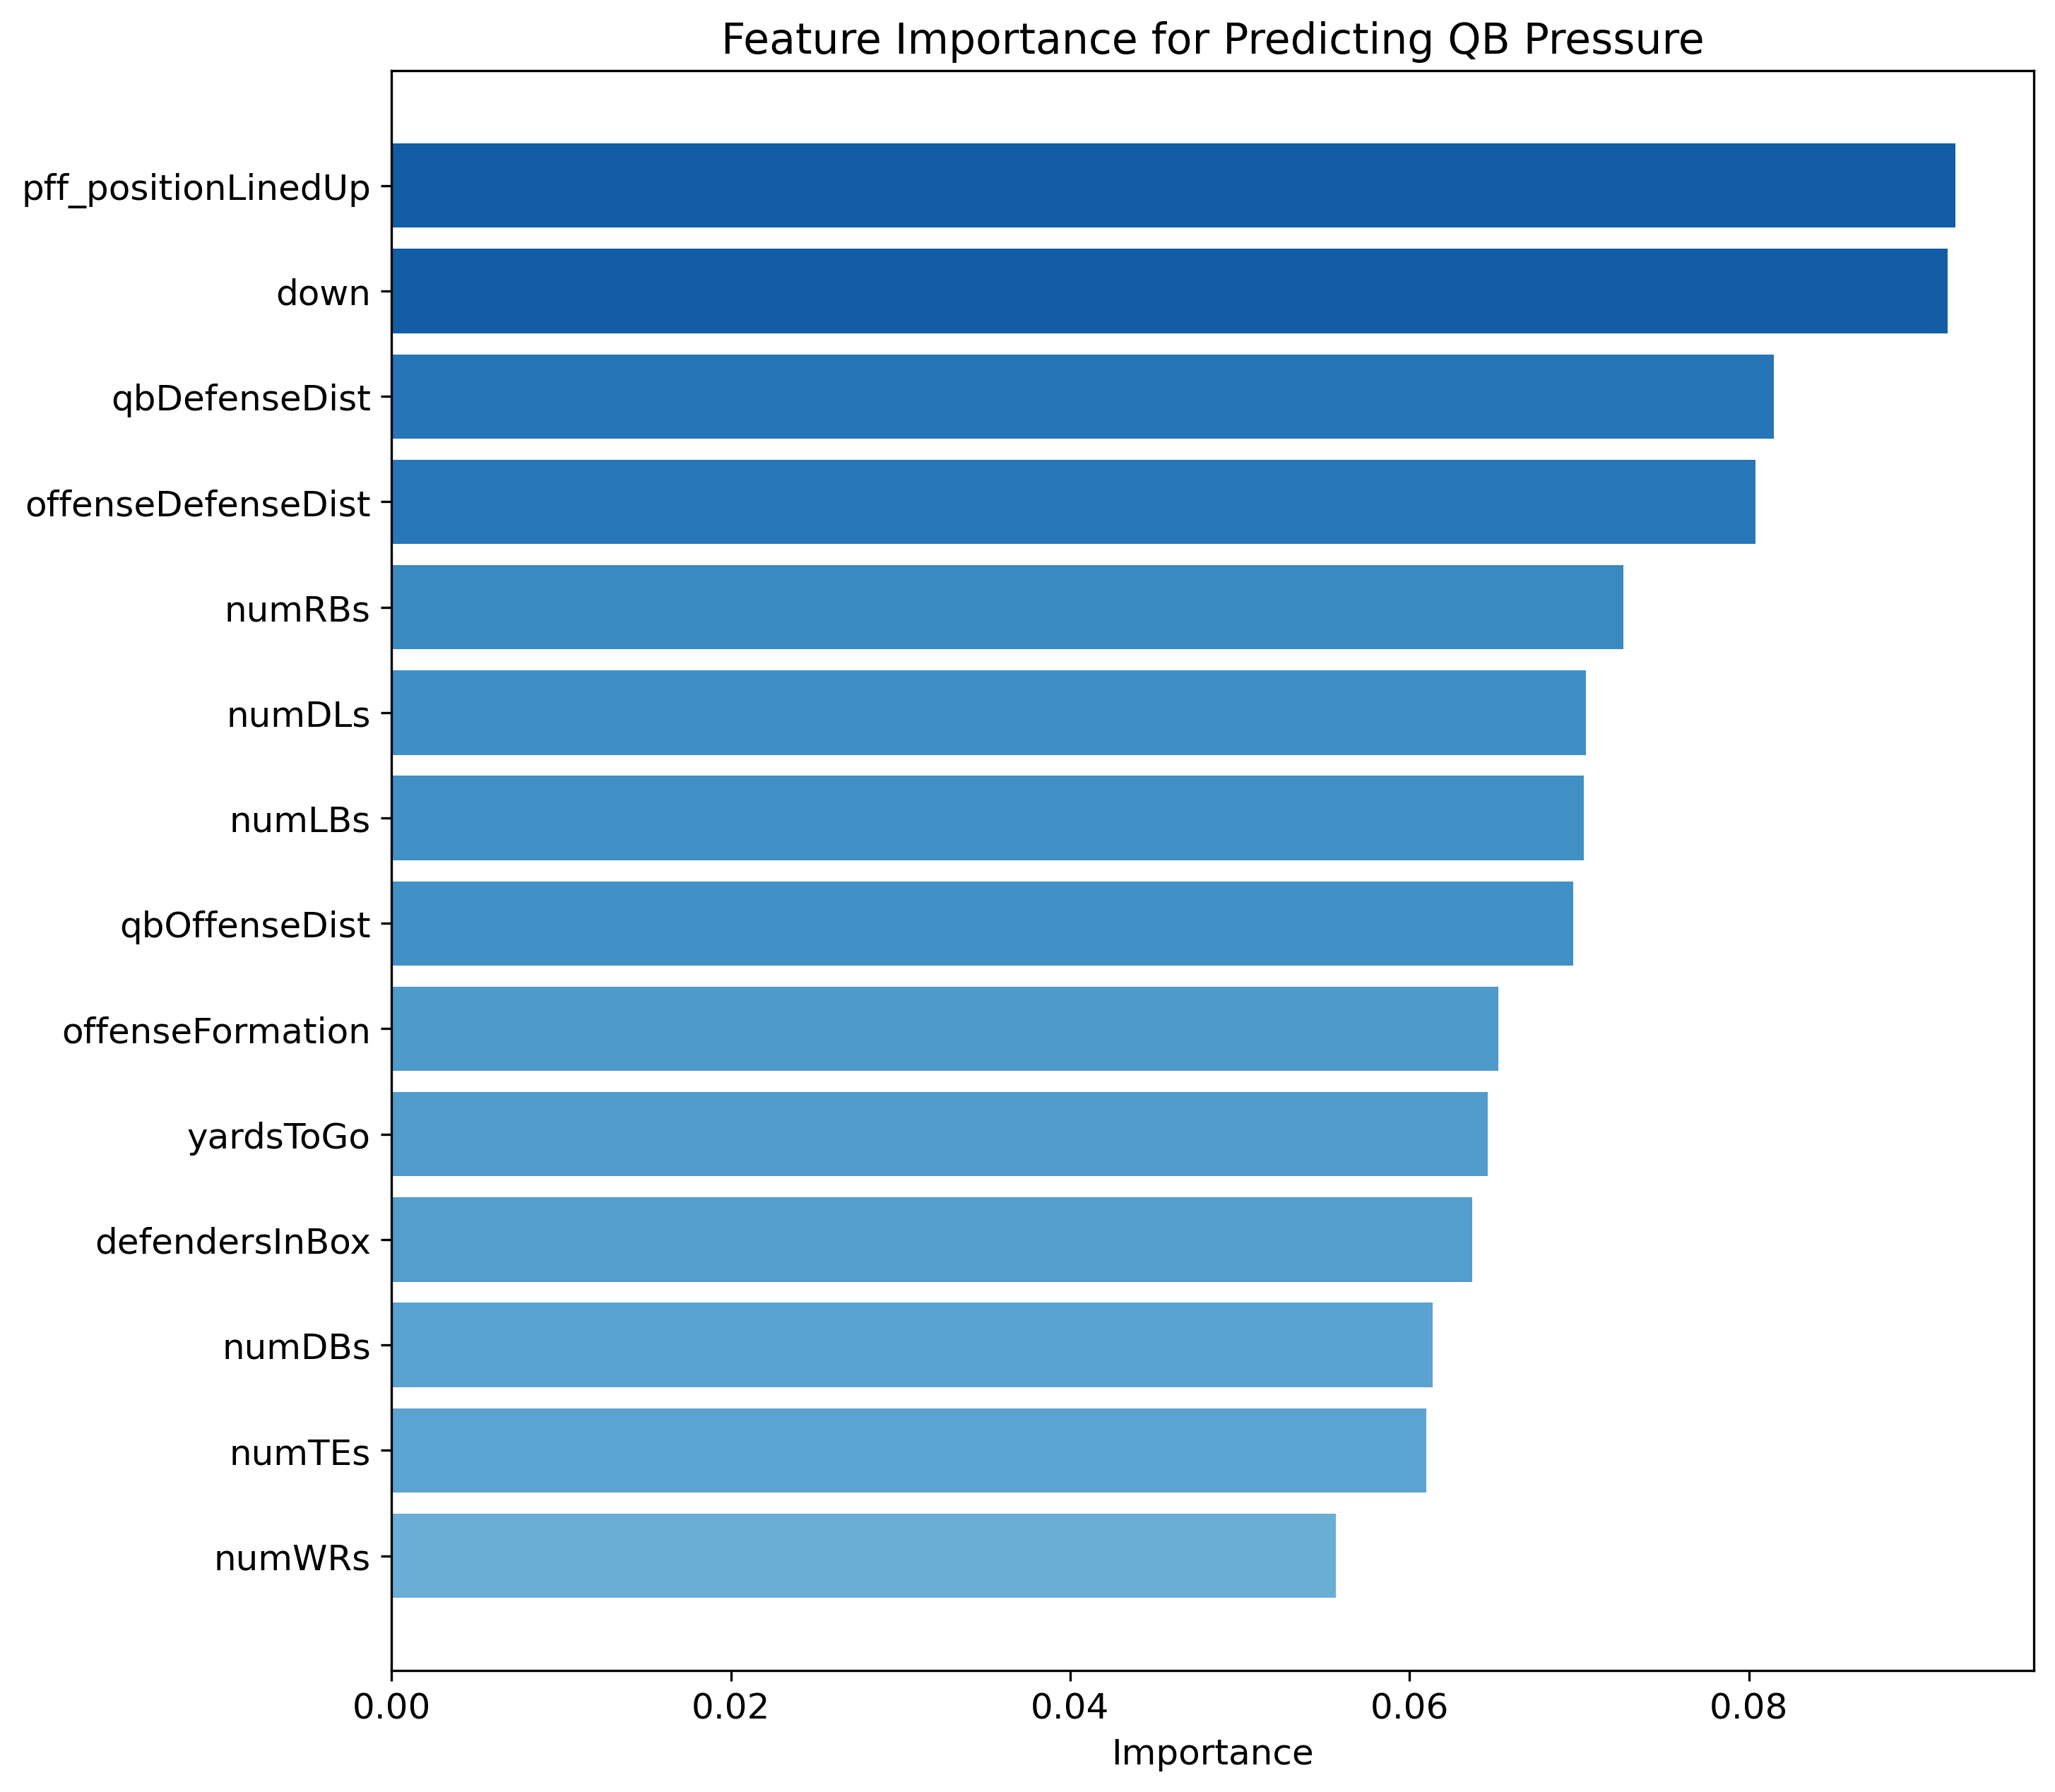

In [174]:
# Plotting Feature Importance
sorted_idx = model.feature_importances_.argsort()
plt.rc('font', size=12)
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(10,10))
Blues = plt.get_cmap('Blues')

blues = []
for i in range(len(model.feature_importances_)):
    blues.append(Blues(model.feature_importances_[sorted_idx][i] * 9))
plt.barh(np.array(column_names)[sorted_idx], model.feature_importances_[sorted_idx], color=blues)
plt.title("Feature Importance for Predicting QB Pressure")
plt.xlabel("Importance")